# 🚧 RACHADURAS EM PEÇAS DE CONCRETO 

**BIBLIOTECAS**

In [7]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from pathlib import Path

**DIRETÓRIOS**

In [8]:
dataset_train_dir = Path(r'C:\Users\Victor\OneDrive - \Área de Trabalho\Concreto\Treino')
dataset_validation_dir = Path(r'C:\Users\Victor\OneDrive - \Área de Trabalho\Concreto\Validação')

dataset_train_normal = len(os.listdir(r'C:\Users\Victor\OneDrive - \Área de Trabalho\Concreto\Treino\Normal'))
dataset_train_rachadura = len(os.listdir(r'C:\Users\Victor\OneDrive - \Área de Trabalho\Concreto\Treino\Rachadura'))

dataset_validation_normal = len(os.listdir(r'C:\Users\e109513\OneDrive - Tokio Marine Seguradora S A\Área de Trabalho\Concreto\Validação\Normal'))
dataset_validation_rachadura = len(os.listdir(r'C:\Users\e109513\OneDrive - Tokio Marine Seguradora S A\Área de Trabalho\Concreto\Validação\Rachadura'))

print('Train Normal: %s' % dataset_train_normal)
print('Train Rachadura: %s' % dataset_train_rachadura)

print('\nValidation Normal: %s' % dataset_validation_normal)
print('Validation Rachadura: %s' % dataset_validation_rachadura)

Train Normal: 10000
Train Rachadura: 10000

Validation Normal: 10000
Validation Rachadura: 10000


**PRÉ-PROCESSAMENTO DE IMAGENS**

In [10]:
image_width = 160
image_height = 160
image_color_channel = 3
image_color_channel_size = 255
image_size = (image_width, image_height)
image_shape = image_size + (image_color_channel,)

batch_size = 32
epochs = 10
learning_rate = 0.0001

class_names = ['normal', 'rachadura'] #array de saída

**DATASET DE TREINAMENTO**

In [11]:
dataset_train = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_train_dir,
    image_size = image_size,
    batch_size = batch_size,
    shuffle = True
)

Found 20000 files belonging to 2 classes.


**DATASET DE VALIDAÇÃO**

In [12]:
dataset_validation = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_validation_dir,
    image_size = image_size,
    batch_size = batch_size,
    shuffle = True
)

Found 20000 files belonging to 2 classes.


**DATASET DE TESTE** - Criado a partir do DATASET DE VALIDAÇÃO

In [13]:
dataset_validation_cardinality = tf.data.experimental.cardinality(dataset_validation)
dataset_validation_batches = dataset_validation_cardinality // 5

dataset_test = dataset_validation.take(dataset_validation_batches)
dataset_validation = dataset_validation.skip(dataset_validation_batches)

print('Validation Dataset Cardinality: %d' % tf.data.experimental.cardinality(dataset_validation))
print('Test Dataset Cardinality: %d' % tf.data.experimental.cardinality(dataset_test))

Validation Dataset Cardinality: 500
Test Dataset Cardinality: 125


In [14]:
autotune = tf.data.AUTOTUNE

dataset_train = dataset_train.prefetch(buffer_size = autotune)
dataset_validation = dataset_validation.prefetch(buffer_size = autotune)
dataset_test = dataset_validation.prefetch(buffer_size = autotune)
#Obs.

In [15]:
def plot_dataset(dataset):

    plt.gcf().clear()
    plt.figure(figsize = (5, 5))

    for features, labels in dataset.take(1):

        for i in range(9):

            plt.subplot(3, 3, i + 1)
            plt.axis('off')

            plt.imshow(features[i].numpy().astype('uint8'))
            plt.title(class_names[labels[i]])

**PLOTAR DATASET DE TREINAMENTO**

<Figure size 640x480 with 0 Axes>

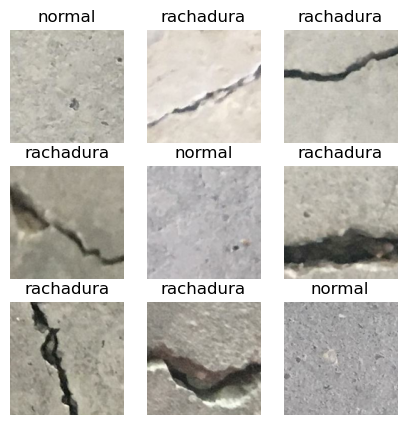

In [16]:
plot_dataset(dataset_train)

**PLOTAR DATASET DE VALIDAÇÃO**

<Figure size 640x480 with 0 Axes>

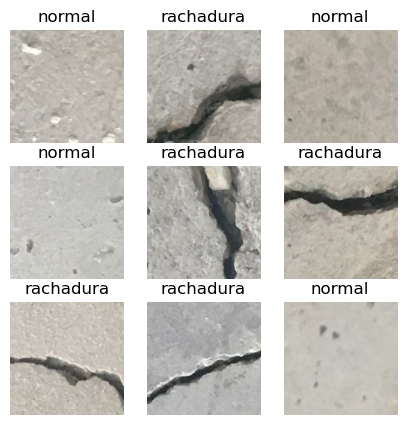

In [17]:
plot_dataset(dataset_validation)

## MODELO DE CLASSIFICAÇÃO

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(
        1. / image_color_channel_size,
        input_shape = image_shape
    ), 
    tf.keras.layers.Conv2D(16, 3, padding = 'same', activation = 'relu'), #camada covolucional de tamanho 16 e Kernel 3x3 
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding = 'same', activation = 'relu'), #camada covolucional de tamanho 32 e Kernel 3x3
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding = 'same', activation = 'relu'), #camada covolucional de tamanho 64 e Kernel 3x3
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'), #camada com 128 nós
    tf.keras.layers.Dense(1, activation = 'sigmoid') #sigmoid retorna valores entre -1 e 1
])

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 160, 160, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 160, 160, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 80, 80, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 80, 80, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 40, 40, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 40, 40, 64)        1

**TREINAMENTO**

In [19]:
history = model.fit(
    dataset_train,
    validation_data = dataset_validation,
    epochs = epochs
)

Epoch 1/10
625/625 [==============================] - 550s 875ms/step - loss: 0.1621 - accuracy: 0.9368 - val_loss: 0.0670 - val_accuracy: 0.9822
Epoch 2/10
625/625 [==============================] - 524s 836ms/step - loss: 0.0518 - accuracy: 0.9837 - val_loss: 0.0567 - val_accuracy: 0.9859
Epoch 3/10
625/625 [==============================] - 505s 807ms/step - loss: 0.0401 - accuracy: 0.9872 - val_loss: 0.0430 - val_accuracy: 0.9874
Epoch 4/10
625/625 [==============================] - 366s 583ms/step - loss: 0.0332 - accuracy: 0.9902 - val_loss: 0.0372 - val_accuracy: 0.9879
Epoch 5/10
625/625 [==============================] - 298s 477ms/step - loss: 0.0265 - accuracy: 0.9920 - val_loss: 0.0328 - val_accuracy: 0.9893
Epoch 6/10
625/625 [==============================] - 298s 476ms/step - loss: 0.0206 - accuracy: 0.9939 - val_loss: 0.0291 - val_accuracy: 0.9916
Epoch 7/10
625/625 [==============================] - 393s 630ms/step - loss: 0.0166 - accuracy: 0.9953 - val_loss: 0.0253 -

**TESTE**

In [20]:
def plot_dataset_predictions(dataset):
    features, labels = dataset.as_numpy_iterator().next()
    predictions = model.predict_on_batch(features).flatten()
    predictions = tf.where(predictions < 0.5, 0, 1)
    
    print('Labels:   %s' % labels)
    print('Predictions: %s' %predictions.numpy())
    
    plt.gcf().clear()
    plt.figure(figsize = (5,5))
    
    for i in range (9):
        plt.subplot(3,3, i + 1)
        plt.axis('off')
        
        plt.imshow(features[i].astype('uint8'))
        plt.title(class_names[predictions[i]])

Labels:   [1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1]
Predictions: [1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1]


<Figure size 640x480 with 0 Axes>

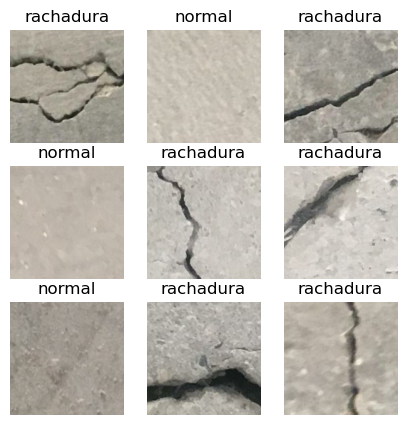

In [21]:
plot_dataset_predictions(dataset_test)

**RESULTADOS**

In [152]:
def plot_model():
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs_range = range(epochs)
    
    plt.gcf().clear()
    plt.figure(figsize = (10,5))
    
    plt.subplot(1, 2, 1)
    plt.title('ACURACIA DE TREINO E VALIDACAO')
    plt.plot(epochs_range, accuracy, label = 'Acuracia de Treinamento', color = 'blue')
    plt.plot(epochs_range, val_accuracy, label = 'Acuracia de Validacao', color='magenta')
    #plt.xlabel("Epochs")
    #plt.ylabel("Acuracia")
    
    plt.legend(loc = 'lower right')
    
    plt.subplot(1,2,2)
    plt.title('LOSS DE TREINO E VALIDACAO')
    plt.plot(epochs_range, loss, label = 'Loss de Treinamento', color='blue')
    plt.plot(epochs_range, val_loss, label = 'Loss de Validacao', color='magenta')
    #plt.xlabel("Epochs")
    #plt.ylabel("Acuracia")
    plt.legend(loc = 'upper right')
    
    plt.show()

<Figure size 640x480 with 0 Axes>

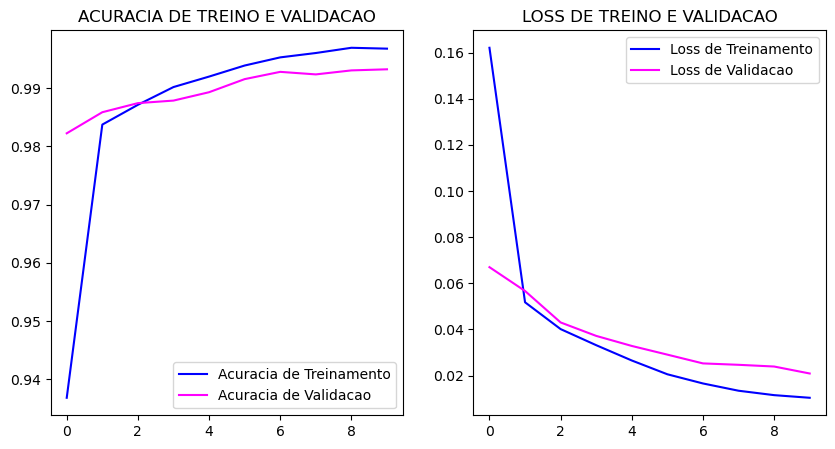

In [153]:
plot_model()

In [90]:
import plotly.express as px
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.metrics import ConfusionMatrixDisplay

In [155]:
fig = px.line(
    history.history,
    y=['loss', 'val_loss'],
    labels={'index': "Epoch", 'value': "Loss"},
    title="Loss de Treinamento e Loss de Validação X Epoch"
)

fig.show()

In [148]:
#Precision = metrics.precision_score(actual, predicted)
#Sensitivity_recall = metrics.recall_score(actual, predicted)
#F1_score = metrics.f1_score(actual, predicted)

#print("Precisao: {:.5f}".format(Precision*100))
#print("Recall: {:.5f}".format(Sensitivity_recall*100))
#print("F1-Score: {:.5f}".format(F1_score*100))

In [72]:
def evaluate_model(model, dataset_test):
    
    results = model.evaluate(dataset_test, verbose=0)
    loss = results[0]
    acc = results[1]
    
    print("    Test Loss: {:.5f}".format(loss))
    print("Test Accuracy: {:.2f}%".format(acc * 100))

In [73]:
evaluate_model(model, dataset_test)

    Test Loss: 0.02075
Test Accuracy: 99.33%
